<a href="https://colab.research.google.com/github/manasc12/RoadMishapRiskAssessment/blob/master/SVM_Implementation_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Follow below links for more info on SVM and cleaning and minMaxScaler
#https://github.com/adashofdata/muffin-cupcake/blob/master/muffin_vs_cupcake_demo.ipynb
#https://youtu.be/N1vOgolbjSc
#https://jinchuika.com/post/1-preprocessing-part-1/
#For Lambda Functions:- https://stackabuse.com/lambda-functions-in-python/#:~:text=In%20Python%2C%20a%20lambda%20function,using%20the%20Python's%20def%20keyword.
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [ ]:
#Read CSV
df_cleaned = pd.read_csv('/Users/manasc12/MyProjects/Data/RealUKAccidentAnalysisData/Accident_Information_Cleaned.csv')

In [ ]:
df_cleaned.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [ ]:
df=df_cleaned.iloc[0:100000,:]
df

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
1,200501BS00007,C,0.0,Unclassified,0.0,Slight,None,2005-01-13,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,20:40,Urban,Fine no high winds,2005,No
2,200501BS00010,A,3212.0,B,304.0,Slight,None,2005-01-15,Saturday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,22:43,Urban,Fine no high winds,2005,No
3,200501BS00011,B,450.0,C,0.0,Slight,None,2005-01-15,Saturday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,16:00,Urban,Fine no high winds,2005,No
4,200501BS00012,A,4.0,B,325.0,Slight,None,2005-01-16,Sunday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:42,Urban,Fine no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2005520141526,A,4.0,A,4175.0,Slight,None,2005-10-28,Friday,2.0,...,Avon and Somerset,Dry,Roundabout,None,50.0,17:45,Rural,Fine no high winds,2005,No
99996,2005520141542,Unclassified,0.0,Unclassified,0.0,Slight,None,2005-10-29,Saturday,1.0,...,Avon and Somerset,Wet or damp,Single carriageway,None,30.0,20:10,Urban,Raining no high winds,2005,No
99997,2005520141615,Unclassified,0.0,Unclassified,0.0,Slight,None,2005-10-25,Tuesday,1.0,...,Avon and Somerset,Dry,Dual carriageway,None,30.0,15:39,Urban,Fine no high winds,2005,No
99998,2005520141631,A,367.0,A,367.0,Slight,None,2005-10-27,Thursday,2.0,...,Avon and Somerset,Dry,Dual carriageway,None,30.0,10:55,Urban,Fine no high winds,2005,No


In [ ]:

_1st_Road_Class               = LabelEncoder()
_2nd_Road_Class               = LabelEncoder()
Carriageway_Hazards           = LabelEncoder()
Day_of_Week                   = LabelEncoder()
Junction_Control              = LabelEncoder()
Junction_Detail               = LabelEncoder()
Light_Conditions              = LabelEncoder()
Local_Authority_Highway       = LabelEncoder()
Police_Force                  = LabelEncoder()
Road_Surface_Conditions       = LabelEncoder()
Road_Type                     = LabelEncoder()
Special_Conditions_at_Site    = LabelEncoder()
Urban_or_Rural_Area           = LabelEncoder()
Weather_Conditions            = LabelEncoder()
InScotland                    = LabelEncoder()


# learn the classes and assign a code to each
_1st_Road_Class.fit(df['1st_Road_Class'])
_2nd_Road_Class.fit(df['2nd_Road_Class'])
Carriageway_Hazards.fit(df['Carriageway_Hazards'])
Day_of_Week.fit(df['Day_of_Week'])
Junction_Control.fit(df['Junction_Control'])
Junction_Detail.fit(df['Junction_Detail'])
Light_Conditions.fit(df['Light_Conditions'])
Local_Authority_Highway.fit(df['Local_Authority_(Highway)'])
Police_Force.fit(df['Police_Force'])
Road_Surface_Conditions.fit(df['Road_Surface_Conditions'])
Road_Type.fit(df['Road_Type'])
Special_Conditions_at_Site.fit(df['Special_Conditions_at_Site'])
Urban_or_Rural_Area.fit(df['Urban_or_Rural_Area'])
Weather_Conditions.fit(df['Weather_Conditions'])
InScotland.fit(df['InScotland'])

# get the encoded column


_1st_Road_Class_E               = _1st_Road_Class.transform(df['1st_Road_Class'])
_2nd_Road_Class_E               = _2nd_Road_Class.transform(df['2nd_Road_Class'])
Carriageway_Hazards_E           = Carriageway_Hazards.transform(df['Carriageway_Hazards'])
Day_of_Week_E                   = Day_of_Week.transform(df['Day_of_Week'])
Junction_Control_E              = Junction_Control.transform(df['Junction_Control'])
Junction_Detail_E               = Junction_Detail.transform(df['Junction_Detail'])
Light_Conditions_E              = Light_Conditions.transform(df['Light_Conditions'])
Local_Authority_Highway_E       = Local_Authority_Highway.transform(df['Local_Authority_(Highway)'])
Police_Force_E                  = Police_Force.transform(df['Police_Force'])
Road_Surface_Conditions_E       = Road_Surface_Conditions.transform(df['Road_Surface_Conditions'])
Road_Type_E                     = Road_Type.transform(df['Road_Type'])
Special_Conditions_at_Site_E    = Special_Conditions_at_Site.transform(df['Special_Conditions_at_Site'])
Urban_or_Rural_Area_E           = Urban_or_Rural_Area.transform(df['Urban_or_Rural_Area'])
Weather_Conditions_E            = Weather_Conditions.transform(df['Weather_Conditions'])
InScotland_E                    = InScotland.transform(df['InScotland'])

dict1={'1st_Road_Class_E':_1st_Road_Class_E,
      '2nd_Road_Class_E':_2nd_Road_Class_E,
      'Carriageway_Hazards_E':Carriageway_Hazards_E,
      'Day_of_Week_E':Day_of_Week_E,
      'Junction_Control_E':Junction_Control_E,
      'Junction_Detail_E':Junction_Detail_E,
      'Light_Conditions_E':Light_Conditions_E,
      'Local_Authority_Highway_E':Local_Authority_Highway_E,
      'Police_Force_E':Police_Force_E,
      'Road_Surface_Conditions_E':Road_Surface_Conditions_E,
      'Road_Type_E':Road_Type_E,
      'Special_Conditions_at_Site_E':Special_Conditions_at_Site_E,
       'Urban_or_Rural_Area_E':Urban_or_Rural_Area_E,
       'Weather_Conditions_E':Weather_Conditions_E,
       'InScotland_E':InScotland_E
      }
df_E1=pd.DataFrame(dict1)
df_E2=pd.concat([df,df_E1],axis=1,ignore_index=0,join='outer')


In [ ]:
df_E2

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Junction_Detail_E,Light_Conditions_E,Local_Authority_Highway_E,Police_Force_E,Road_Surface_Conditions_E,Road_Type_E,Special_Conditions_at_Site_E,Urban_or_Rural_Area_E,Weather_Conditions_E,InScotland_E
0,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,0,1,57,20,1,0,4,1,1,0
1,200501BS00007,C,0.0,Unclassified,0.0,Slight,None,2005-01-13,Thursday,1.0,...,9,1,57,20,1,3,4,1,1,0
2,200501BS00010,A,3212.0,B,304.0,Slight,None,2005-01-15,Saturday,1.0,...,0,1,57,20,1,3,4,1,1,0
3,200501BS00011,B,450.0,C,0.0,Slight,None,2005-01-15,Saturday,1.0,...,9,4,57,20,1,3,4,1,1,0
4,200501BS00012,A,4.0,B,325.0,Slight,None,2005-01-16,Sunday,1.0,...,0,1,57,20,1,3,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2005520141526,A,4.0,A,4175.0,Slight,None,2005-10-28,Friday,2.0,...,7,4,3,0,1,2,4,0,1,0
99996,2005520141542,Unclassified,0.0,Unclassified,0.0,Slight,None,2005-10-29,Saturday,1.0,...,9,1,83,0,5,3,4,1,5,0
99997,2005520141615,Unclassified,0.0,Unclassified,0.0,Slight,None,2005-10-25,Tuesday,1.0,...,9,4,83,0,1,0,4,1,1,0
99998,2005520141631,A,367.0,A,367.0,Slight,None,2005-10-27,Thursday,2.0,...,5,4,3,0,1,0,4,1,1,0


In [ ]:
df_E2.dropna(how="all",inplace=True) # drops the empty line at file-end

In [ ]:

usefulCols=['Accident_Severity','1st_Road_Number','2nd_Road_Number','Did_Police_Officer_Attend_Scene_of_Accident',
           'Number_of_Casualties','Number_of_Vehicles','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities',
           'Speed_limit','1st_Road_Class_E','2nd_Road_Class_E','Carriageway_Hazards_E','Day_of_Week_E','Junction_Control_E',
           'Junction_Detail_E','Light_Conditions_E','Local_Authority_Highway_E','Police_Force_E','Road_Surface_Conditions_E',
           'Road_Type_E','Special_Conditions_at_Site_E','Urban_or_Rural_Area_E','Weather_Conditions_E','InScotland_E']
df_E2=df_E2[usefulCols]
df_E2.dtypes

Accident_Severity                               object
1st_Road_Number                                float64
2nd_Road_Number                                float64
Did_Police_Officer_Attend_Scene_of_Accident    float64
Number_of_Casualties                             int64
Number_of_Vehicles                               int64
Pedestrian_Crossing-Human_Control              float64
Pedestrian_Crossing-Physical_Facilities        float64
Speed_limit                                    float64
1st_Road_Class_E                                 int64
2nd_Road_Class_E                                 int64
Carriageway_Hazards_E                            int64
Day_of_Week_E                                    int64
Junction_Control_E                               int64
Junction_Detail_E                                int64
Light_Conditions_E                               int64
Local_Authority_Highway_E                        int64
Police_Force_E                                   int64
Road_Surfa

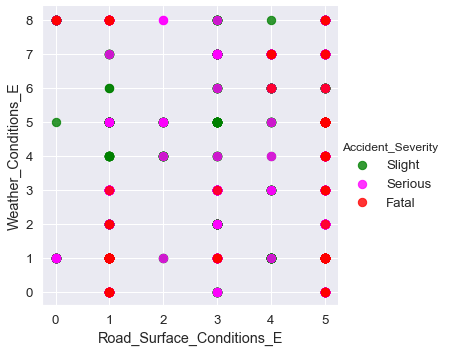

In [ ]:
# Plot two ingredients
#You can usea dictionary to specify different colours
sns.lmplot('Road_Surface_Conditions_E', 'Weather_Conditions_E', data=df_E2, hue='Accident_Severity',
           palette={'Slight':'Green','Fatal':'Red','Serious':'magenta'}, fit_reg=False, scatter_kws={"s": 70});

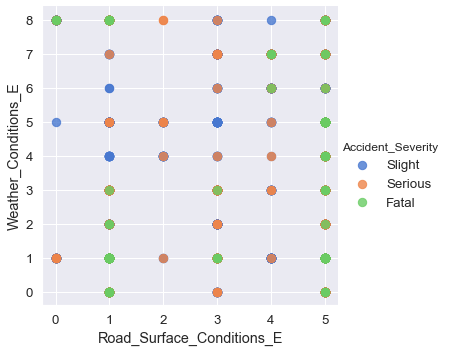

In [ ]:
# Plot two ingredients
#Choose colour palette from : https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html
sns.lmplot('Road_Surface_Conditions_E', 'Weather_Conditions_E', data=df_E2, hue='Accident_Severity',
           palette='muted', fit_reg=False, scatter_kws={"s": 70});

In [ ]:
x=df_E2.iloc[0:50000,1:].values
y=df_E2.iloc[0:50000,0].values

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

In [ ]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.23660575e-01 -8.74585943e-02 -1.73218023e-02 -4.68396702e-02
   2.48267716e-02 -7.10219137e-02  3.17353542e-01 -2.24092194e-01
  -7.48099630e-02 -1.49474796e-02 -2.90854576e-01 -2.62946439e-01
  -6.58301990e-01 -3.80866896e-01 -1.88415890e-01  5.85558130e-02
  -6.43824585e-02 -5.69029196e-02 -9.29936746e-02  1.56721406e-01
  -1.75997264e-02  1.28129950e-02  0.00000000e+00]
 [-2.84417470e-01 -1.16214530e-01  3.45271227e-02 -4.07888043e-02
   3.86894341e-02  1.05636401e-01 -5.36690844e-01 -1.46611463e-01
  -3.28070671e-01 -1.67518759e-02 -1.24432823e-01  1.78620825e-01
  -3.30627111e-01  2.73059907e-01  8.68590379e-02 -1.18732511e-01
  -6.61016377e-02 -1.56839665e-01  1.23350750e-01 -1.17282870e-02
   4.17160825e-01  3.73509448e-02  0.00000000e+00]
 [ 6.63614047e-03  1.06409913e-01  6.93698217e-02 -2.55754732e-02
  -7.51273334e-02 -2.97019197e-02 -9.65066618e-02 -3.15578841e-02
  -3.92659914e-01 -2.45553369e-01  1.41421986e-01 -4.14845809e-01
  -1.61570698e-01  3.66194

In [ ]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.3250863807612454
1.9131038220350636
1.6408475131209135
1.214976192347194
1.1332453491842212
1.1033635827973536
1.052000473639106
1.021291339385009
1.011597019536348
1.0016903124862762
0.9880482771391964
0.9640999630796139
0.9504842540676631
0.9110157268871188
0.8485407682433984
0.8085239089763248
0.7727422419094626
0.628963573113686
0.5180663164486423
0.43884210916771815
0.4095841856832844
0.34432669879134836
0.0


In [ ]:
eig_pairs

[(2.3250863807612454,
  array([-0.12366057, -0.28441747,  0.00663614, -0.04211794, -0.01264808,
         -0.03468748, -0.41967931, -0.02833619,  0.32592159,  0.42380593,
          0.00057561,  0.00118542,  0.50518473,  0.31761627,  0.06541158,
         -0.05169225, -0.00867403,  0.02131914,  0.26668303,  0.01601234,
         -0.05015516,  0.01994667,  0.        ])),
 (1.9131038220350636,
  array([-0.08745859, -0.11621453,  0.10640991, -0.20554027, -0.19837314,
          0.04250666,  0.17918386, -0.59113918,  0.1564613 ,  0.08110947,
          0.00359212, -0.00522049, -0.12800809, -0.07545534, -0.03603003,
          0.06237697,  0.12903542, -0.20388391,  0.1903814 , -0.03956362,
          0.56966195, -0.15379417,  0.        ])),
 (1.6408475131209135,
  array([-0.0173218 ,  0.03452712,  0.06936982, -0.03683473,  0.0335086 ,
         -0.00666214, -0.06420189,  0.15456671, -0.05084764, -0.06742009,
         -0.00657322, -0.02081013,  0.04335814,  0.06248333,  0.33011464,
         -0.020317

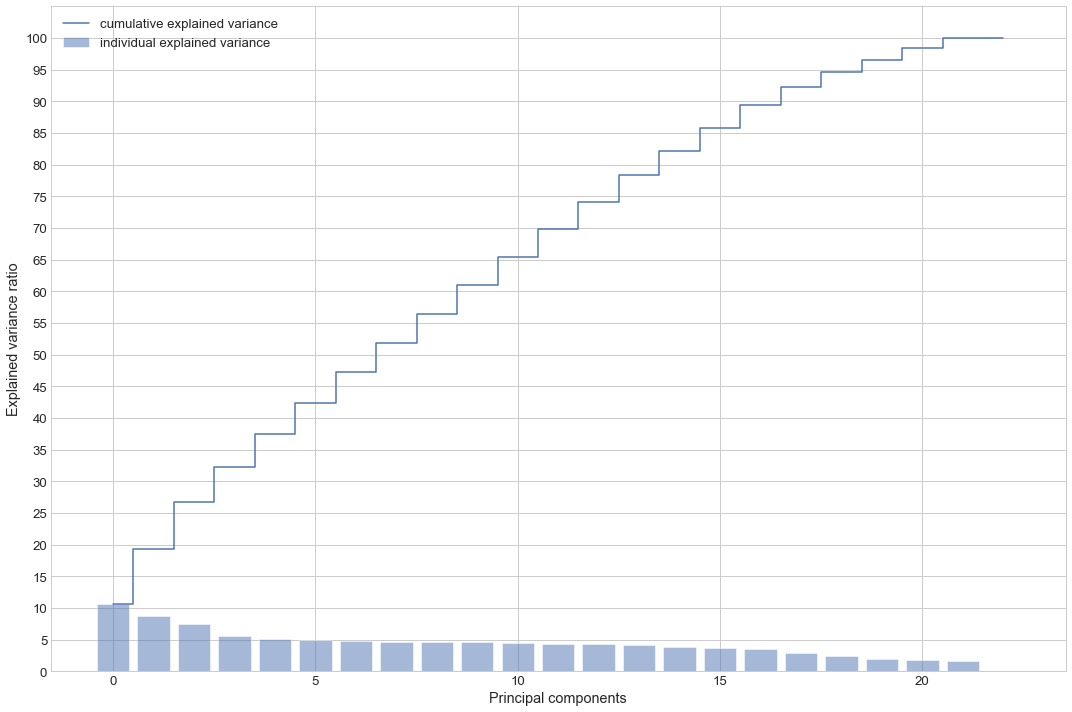

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15, 10))

    plt.bar(range(23), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(23), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.yticks(np.arange(0,105,5))
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(23,1),
                     eig_pairs[1][1].reshape(23,1),
                     eig_pairs[2][1].reshape(23,1),
                     eig_pairs[3][1].reshape(23,1),
                     eig_pairs[4][1].reshape(23,1),
                     eig_pairs[5][1].reshape(23,1),
                     eig_pairs[6][1].reshape(23,1),
                     eig_pairs[7][1].reshape(23,1),
                     eig_pairs[8][1].reshape(23,1),
                     eig_pairs[9][1].reshape(23,1),
                     eig_pairs[10][1].reshape(23,1),
                     eig_pairs[11][1].reshape(23,1),
                     eig_pairs[12][1].reshape(23,1),
                     eig_pairs[13][1].reshape(23,1),
                     eig_pairs[14][1].reshape(23,1),
                     eig_pairs[15][1].reshape(23,1)
                     
                     ))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-1.23660575e-01 -8.74585943e-02 -1.73218023e-02 -7.48099630e-02
  -6.58301990e-01 -3.80866896e-01  5.85558130e-02 -9.29936746e-02
   1.56721406e-01  1.28129950e-02 -1.75997264e-02 -5.69029196e-02
  -6.43824585e-02 -1.88415890e-01 -2.62946439e-01 -2.90854576e-01]
 [-2.84417470e-01 -1.16214530e-01  3.45271227e-02 -3.28070671e-01
  -3.30627111e-01  2.73059907e-01 -1.18732511e-01  1.23350750e-01
  -1.17282870e-02  3.73509448e-02  4.17160825e-01 -1.56839665e-01
  -6.61016377e-02  8.68590379e-02  1.78620825e-01 -1.24432823e-01]
 [ 6.63614047e-03  1.06409913e-01  6.93698217e-02 -3.92659914e-01
  -1.61570698e-01  3.66194244e-01  2.17648828e-02 -2.04892003e-01
   2.08445257e-02  1.41730567e-02 -3.31782998e-01  3.80735964e-01
   2.92953140e-01  1.24903434e-01 -4.14845809e-01  1.41421986e-01]
 [-4.21179383e-02 -2.05540267e-01 -3.68347340e-02  5.52446897e-01
  -2.46901148e-01  2.16926498e-01 -4.51082049e-02 -7.31787962e-03
  -1.29444379e-02  6.84547398e-02  8.00347538e-02 -1.21492408e

In [ ]:
#Prepare the Data with the eigen values u've got
Y = X_std.dot(matrix_w)

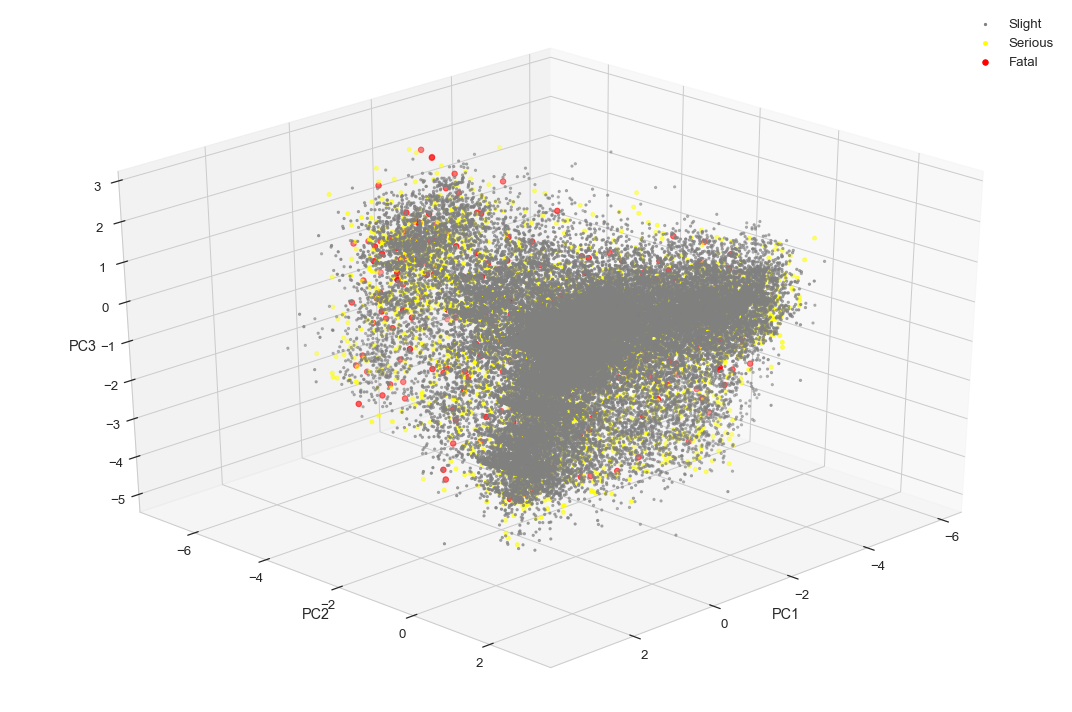

In [ ]:
#https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

from mpl_toolkits.mplot3d import Axes3D

with plt.style.context('seaborn-whitegrid'):
    fig=plt.figure(figsize=(15, 10))
    ax=fig.add_subplot(111, projection='3d')
    for lab, col, si in zip(('Slight', 'Serious', 'Fatal'),
                        ('grey', 'yellow', 'red'),
                        (5,15,30)):
        ax.scatter(Y[y==lab, 0],Y[y==lab, 1], Y[y==lab, 2] ,label=lab, c=col, s=si)
        ax.view_init(30, 45)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    


In [ ]:
# Fit the SVM model
#https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(Y, y, test_size=0.1,random_state=109)
model = svm.SVC(kernel='poly',decision_function_shape='ovr')


In [ ]:
x_train.shape

(45000, 16)

In [ ]:
model.fit(x_train,y_train)

SVC(kernel='poly')

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8794


In [ ]:
print(y_test[1000:1100]+"|"+y_pred[1000:1100])

['Serious|Slight' 'Slight|Slight' 'Serious|Slight' 'Slight|Slight'
 'Slight|Slight' 'Slight|Slight' 'Serious|Slight' 'Serious|Slight'
 'Slight|Slight' 'Slight|Slight' 'Slight|Slight' 'Serious|Slight'
 'Slight|Slight' 'Serious|Slight' 'Slight|Slight' 'Slight|Slight'
 'Slight|Slight' 'Slight|Slight' 'Serious|Slight' 'Slight|Slight'
 'Serious|Slight' 'Slight|Slight' 'Slight|Slight' 'Slight|Slight'
 'Slight|Slight' 'Slight|Slight' 'Slight|Slight' 'Serious|Slight'
 'Slight|Slight' 'Slight|Slight' 'Slight|Slight' 'Slight|Slight'
 'Slight|Slight' 'Serious|Slight' 'Slight|Slight' 'Slight|Slight'
 'Slight|Slight' 'Slight|Slight' 'Slight|Slight' 'Serious|Slight'
 'Slight|Slight' 'Serious|Slight' 'Slight|Slight' 'Serious|Slight'
 'Slight|Slight' 'Slight|Slight' 'Slight|Slight' 'Serious|Slight'
 'Slight|Slight' 'Slight|Slight' 'Slight|Slight' 'Slight|Slight'
 'Slight|Slight' 'Slight|Slight' 'Slight|Slight' 'Slight|Slight'
 'Slight|Slight' 'Slight|Slight' 'Serious|Slight' 'Slight|Slight'
 'Slight|S

In [ ]:
from joblib import dump, load
model=load('SVM_trained_model.joblib')
x1=df_E2.iloc[50000:,1:].values
y_test1=df_E2.iloc[50000:,0].values
X_std1 = StandardScaler().fit_transform(x1)
cov_mat1 = np.cov(X_std1.T)

eig_vals1, eig_vecs1 = np.linalg.eig(cov_mat1)
for ev in eig_vecs1.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    
    # Make a list of (eigenvalue, eigenvector) tuples
eig_pairs1 = [(np.abs(eig_vals1[i]), eig_vecs1[:,i]) for i in range(len(eig_vals1))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs1.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs1:
    print(i[0])
    
matrix_w1 = np.hstack((eig_pairs1[0][1].reshape(23,1),
                     eig_pairs1[1][1].reshape(23,1),
                     eig_pairs1[2][1].reshape(23,1),
                     eig_pairs[3][1].reshape(23,1),
                     eig_pairs[4][1].reshape(23,1),
                     eig_pairs[5][1].reshape(23,1),
                     eig_pairs[6][1].reshape(23,1),
                     eig_pairs[7][1].reshape(23,1),
                     eig_pairs[8][1].reshape(23,1),
                     eig_pairs[9][1].reshape(23,1),
                     eig_pairs[10][1].reshape(23,1),
                     eig_pairs[11][1].reshape(23,1),
                     eig_pairs[12][1].reshape(23,1),
                     eig_pairs[13][1].reshape(23,1),
                     eig_pairs[14][1].reshape(23,1),
                     eig_pairs[15][1].reshape(23,1),
                     
                     ))

print('Matrix W1:\n', matrix_w1)
x_test1 = X_std1.dot(matrix_w1)
y_pred1=model.predict(x_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Eigenvalues in descending order:
2.1151298938757703
2.0053810926530886
1.5275007917962138
1.5146482038140254
1.2135731662794091
1.0879443719628807
1.0762453062061665
1.021043680619222
1.0041194718723991
0.9850433134710214
0.9822877392654191
0.9526441535133926
0.8701330037207372
0.8224350747387404
0.7825997595514698
0.7603637927120839
0.6602249676404868
0.6231449799750689
0.5777621550668074
0.5594631924339195
0.5145684857789278
0.34418341185292683
0.0
Matrix W1:
 [[-4.55296852e-02 -2.23165416e-01  3.07048980e-01 -7.48099630e-02
  -6.58301990e-01 -3.80866896e-01  5.85558130e-02 -9.29936746e-02
   1.56721406e-01  1.28129950e-02 -1.75997264e-02 -5.69029196e-02
  -6.43824585e-02 -1.88415890e-01 -2.62946439e-01 -2.90854576e-01]
 [ 3.25721223e-02 -2.96510897e-01  3.02605623e-01 -3.28070671e-01
  -3.30627111e-01  2.73059907e-01 -1.18732511e-01  1.23350750e-01
  -1.17282870e-02  3.73509448e-02  4.17160825e-01 -1.56839665e-01
  -6.61016377e-02  8.68590379e-02  1.78620825e-01 -1.24432823e-01]
 [-

In [ ]:
#saving the trained model
#https://www.geeksforgeeks.org/saving-a-machine-learning-model/
dump(model, 'SVM_trained_model.joblib') 

['SVM_trained_model.joblib']

In [ ]:
truth_arr=y_pred1[y_test1=='Serious']=='Serious'

In [ ]:
len(np.where(truth_arr==False)[0])

5316